# Introducción al manejo de datos geográficos

# Clase 3 

##  Parte 2. Clases y objetos
### Utilizando el contexto edilicio para definir nuestros propios métodos. 

#### Algunos conceptos básicos

Como ya deben saber o haber escuchado, `python` es un lenguaje de programación orientado a objetos.

Un objeto es simplemente una colección de datos (variables) y métodos (funciones) que actúan sobre esos datos. Del mismo modo, una clase es un plano para ese objeto. Es la definición de su estructura, es decir, de todos los elementos que lo componen. 

Por lo tanto, podemos pensar a la clase como un boceto del objeto. Por ejemplo, si quisiéramos crear un objeto de tipo casa, deberíamos contar con un detalle sobre cuántas habitaciones tendrá, en cuántas plantas se dispondrá, cómo serán sus ventanas, escaleras, etc. Con base a estas definiciones (el boceto o plano) es que construimos la casa. 

Por ende, se considera objeto al "resultado" o instancia de una clase. Tal es así que podemos hablar de objeto o, incluso, directamente de instancia o evento. 

Supongamos que la clase con la que definimos nuestro objeto casa, se denomina vivienda y que fue desarrollada para definir distintas tipologías habitacionales. La casa podría ser una de ellas (más asociada a la noción de vivienda unifamiliar), pero también existen otras que responden a características diferentes -por ahí más relacionadas con la idea de vivienda multifamiliar - como son los edificios de departamentos, dúplex o incluso, viviendas colectivas como hoteles u hospitales. Todas ellas con un conjunto de atributos y una serie de métodos que definen tanto las características principales como de las actividades que allí se pueden llevar a cabo.   

Si tenemos una clase llamada `vivienda`, los objetos `edificio`, `casa` u `hotel` serán instancias de esa clase (cada una con características que las distinguen del resto). Este proceso se conoce como *instanciación*. Así es que podemos tener distintas casas, edificios u hoteles. Una clase crea un `namespace local` que es, básicamente, la forma en la que se puede acceder al objeto. Por ejemplo: 

In [1]:
class Vivienda:
    '''Clase para la definición de tipologías habitacionales.'''
    def __init__(self, h=0, p=0, t='',o=0):
        self.habitaciones = h
        self.pisos = p
        self.habitantes = o
        self.tipo =t 

    def obtener_caracteristicas_generales(self):
        print(self.tipo+' con '+str(self.pisos)+' pisos,'+
              str(self.habitaciones)+' habitaciones y '+
              str(self.habitantes)+' ocupantes.')

In [2]:
# si creamos la clase vivienda
Vivienda.__doc__

'Clase para la definición de tipologías habitacionales.'

In [3]:
# e instanciamos el objeto casa
casa = Vivienda(h=4, p=2, t='Vivienda multifamiliar de dos plantas', o=6)

In [4]:
# la forma que tenemos de acceder al mismo, es a través de su nombre.
casa

Cuando asignamos `casa = Vivienda()`, estamos guardando en memoria un objeto que tiene un nombre asociado (casa). A ese objeto, le corresponde una dirección en la RAM, a la que podemos acceder haciendo: 

In [5]:
print('id(casa) =', id(casa))

id(casa) = 139975753601656


In [6]:
# así es que instanciamos una
casa.obtener_caracteristicas_generales()

Vivienda multifamiliar de dos plantas con 2 pisos,4 habitaciones y 6 ocupantes.


Y como dijimos, hubiésemos podido crear otras viviendas, o por qué no también otro tipo de casas:

In [7]:
casa_de_veraneo = Vivienda(h=1, p=0, t='Vivienda de uso transitorio u ocacional',o=2)

In [8]:
# las que una vez instanciadas son creadas como objetos diferentes, que ocupan distintos espacios
print('id(casa_de_veraneo) =', id(casa_de_veraneo))

id(casa_de_veraneo) = 139975744742456


El nombre con el que instanciamos a la clase nos permite acceder a sus atributos, los cuales pueden ser tanto data en general: 

In [9]:
# la casa puede contar con
type(casa.habitaciones)

int

In [10]:
# o una breve descripcion
type(casa.tipo)

str

...como métodos. Estos últimos no son más que funciones propias a esa clase. 

In [11]:
# obtener_caracteristicas_generales es una función de la clase vivienda
Vivienda.obtener_caracteristicas_generales

<function __main__.Vivienda.obtener_caracteristicas_generales(self)>

In [12]:
# o el método del objeto casa
casa.obtener_caracteristicas_generales

<bound method Vivienda.obtener_caracteristicas_generales of <__main__.Vivienda object at 0x7f4ea5121278>>

Y este es un buen momento para introducir el uso de la convención `self`. Habrán notado que la función `obtener_caracteristicas_generales` cuenta con esta como primer argumento. Esto sucede porque cuando un objeto llama sus métodos, el objeto en sí es pasado como argumento. Lo que se decodifica con la palabra `self`.

In [13]:
# el método de un objeto,
casa.obtener_caracteristicas_generales()

Vivienda multifamiliar de dos plantas con 2 pisos,4 habitaciones y 6 ocupantes.


In [14]:
# equivale a la función de la clase
Vivienda.obtener_caracteristicas_generales(casa)

Vivienda multifamiliar de dos plantas con 2 pisos,4 habitaciones y 6 ocupantes.


También habrán notado el uso del `__init__()`. Estos se conocen como constructores y permiten crear funciones especiales, las cuales son llamadas cuando la clase es instanciada. Es decir que, es una función que permite inicializar un conjunto de variables que están vacías por default.

In [15]:
# esta casa, por ejemplo, la definimos con...
casa.habitaciones

4

In [16]:
# valor que podría ser actualizado, si sufriera algún tipo de corrección futura
casa.habitaciones = 5

In [17]:
# nuevo atributo
casa.habitaciones

5

Bueno, y ahora cómo es que esto podría servirnos. Por lo que estuvimos viendo, el concepto de instanciar clases (o crear objetos) mantiene cierta similitud con lo que en ciencias sociales - más específicamente en sociología, se conoce como proceso de operacionalización. En términos muy breves, este supone la reducción de niveles de abstracción como condición para la definición y medición de un fenónemo en particular. 

Si quisiéramos explicar cómo funciona una ciudad, por ejemplo, deberíamos saber qué atributos y métodos la componen. Vamos a hablar de tránsito?, de vivienda?, de ambiente?, etc. 

Con lo cual, la creación de nuestras propias clases, podría ser un esquema de trabajo bastante práctico para definir objetos que nos resultan de particular interés. O que buscamos estudiar. 

A continuación, vamos a crear una clase que nos sirva para describir una porción de territorio urbano. Este proceso no sólo representa un desafío en términos programáticos (de codeo) sino también desde un sentido exclusivamente conceptual. 

Cómo diseñamos el conjunto de métodos que articulan los atributos de una clase tiene mucho que ver con lo que nosotros conocemos o pensamos de ese objeto que queremos crear. 

#### Territorio y Contexto Urbano

A continuación, vamos a suponer un escenario en el que - como especialistas -, somos consultados en la elaboración de un proyecto de renovación urbana en la Ciudad de Buenos Aires. El mismo, supone la ejecución de una partida presupuestaria destinada a construir nuevas unidades funcionales en áreas de baja densidad. A su vez, una parte de estos recursos serán destinados al mejoramiento y restauración de inmuebles en condiciones de recuperabilidad con fines exclusivamente habitacionales.  

Para esto, se nos pide que elaboremos un diagnóstico de la condición habitacional de la ciudad. Para poder hacerlo, vamos a crear una clase que nos sirva de plantilla para describir esta porción del territorio, en términos exclusivamente urbanos. Es decir, que vamos a pensar atributos y métodos que calcen con el fenómeno que buscamos decsribir.

Un territorio urbano cuenta con varios atributos que serían útiles para describir el contexto que lo caracteriza. En nuestro caso, estamos enfocados en la situación habitacional y en cómo describirla. Y sabemos que el último Censo nos proporciona información sobre la calidad constructiva de las viviendas al máximo nivel de desagregción disponible en fuentes oficiales. 

También sabemos que un atributo del territorio urbano es la existencia de distintos niveles o áreas de agregación geográfica. Por ende, podemos tratar de relacionarlos y ver si nuestra variable de interés se distribuye de manera totalmente aleatoria o si presenta algún patrón de concentración en el territorio. Para esto, nos apoyaremos en un una de las propuestas que se llevan a cabo en [este artículo](http://www.ub.edu/geocrit/sn/sn-169.htm) para desarrollar medidas de segregación en el territorio.

La que utilizaremos en esta clase, se encuentra brevemente analizada [aquí](https://medium.com/@fcatalano/una-aproximaci%C3%B3n-cuantitativa-a-los-patrones-de-asentamiento-humano-en-el-gba-ae998d6023d9). El indicador que utilizaremos se define como:

![IDC](../imagenes/indice_de_concentracion.png) 

y describe la manera en la que se distribuye un grupo en el espacio a partir de la relación entre distintos niveles administrativos (uno de mayor y otro de menor agregación). El mismo varía entre cero y uno indicando distribuciones igualitarias o de máxima concentración. “Con este índice se calcula la diferencia entre la proporción de individuos del grupo minoritario (X) y la proporción del resto de población en cada unidad espacial. De hecho, el valor cero sólo se alcanza cuando en todas las unidades hay la misma proporción entre el grupo X y el resto de población” (Martori Cañas & Hoberg, 2004). En nuestro ejemplo, los grupos serán las viviendas según su estado de conservación. Información que utilizaremos para nuestro diagnóstico.

In [18]:
# en primer lugar creamos una función que nos ordene un gdf en función de áreas de mayor y menor nivel
def atributos_urbanos(inferior_gdf, idas, idai, universo, categoria):
    '''
    Agrupa los totales de la variable y categoría deseada a un nivel administrativo 
    superior y los mapea en el gdf de nivel administrativo inferior 
     ...
    
    Parametros:
    -----------
    inferior_gdf(gdf): area de análisis de nivel administrativo inferior
    idas(str): id del area administrativa superior
    idai(str): id del area administrativa inferior
    universo(str): nombre de la variable que contiene el universo 
                   total de nuestra categoría (e.g.: "hogares","viviendas","personas")
    categria(str): nombre de la categoría en la que se clasifica
                   nuestra variable de análisis (e.g.: "hogares con NBI","viviendas recuperables")
    
    Devuelve:
    -------
    dict: dataframes con totales para cada nivel administrativo
    '''
    
    # area administrativa superior
    total_universo_as = inferior_gdf.groupby(idas)[['VIVIEND']].sum()
    total_categoria_as = inferior_gdf.groupby(idas)[['recuperables']].sum()
    area_superior = total_universo_as.join(total_categoria_as)
    area_superior.columns=['variable','categoria']

    # thiner area
    area_inferior = inferior_gdf.set_index(idai).loc[:,[universo,categoria]]
    area_inferior.columns=['variable','categoria']
    
    return {'superior':area_superior, 'inferior':area_inferior}

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
radios_inmat = gpd.read_file('../carto/radios_inmat.shp')

In [28]:
radios_inmat.columns

Index(['RADIO_I', 'BARRIO', 'COMUNA', 'POBLACI', 'VIVIEND', 'HOGARES',
       'HOGARES_', 'AREA_KM', 'Código', 'Calidad 1', 'Calidad 2', 'Calidad 3',
       'Calidad 4', 'union', 'aceptables', 'recuperabl', 'irrecupera',
       'geometry'],
      dtype='object')

In [33]:
# renombramos algunas columnas
radios_inmat.rename(columns= {'recuperabl':'recuperables', 
                     'irrecupera':'irrecuperables'}, inplace=True)

In [34]:
radios_inmat.columns

Index(['RADIO_I', 'BARRIO', 'COMUNA', 'POBLACI', 'VIVIEND', 'HOGARES',
       'HOGARES_', 'AREA_KM', 'Código', 'Calidad 1', 'Calidad 2', 'Calidad 3',
       'Calidad 4', 'union', 'aceptables', 'recuperables', 'irrecuperables',
       'geometry'],
      dtype='object')

In [35]:
# creamos lo que serán nuestras "unidades administrativas" 
unidad_administrativa = atributos_urbanos(inferior_gdf=radios_inmat, 
                                          idas='COMUNA', idai='RADIO_I', 
                                          universo='VIVIEND', categoria='recuperables')

Así como un objeto pez tiene un par de aletas, o a un objeto cebra lo distinguen sus rayas (para ser lo más figurativos posibles) a nuestro objeto territorio lo va a caracterizar la presencia de un área administrativa superior y otra inferior. 

Esto se completa un poco más cuando, a partir de la incorporación de algunos métodos, logramos hacer cosas como describir a nuestro objeto no sólo por la presencia de ciertos atributos, sino también por la manera en la que estos se relacinoan entre sí. Probemos alguna... 

In [36]:
# Nuestro territorio cuenta con un unidad administrativa inferior, con totales de una variable y de alguna de sus categorías.
unidad_administrativa['inferior'].head()

variable  categoria
RADIO_I                     
1_1_1        82.0         14
1_12_1      365.0         12
1_12_10     629.0         14
1_12_11     375.0         24
1_12_2      445.0         22

In [37]:
# y nuestra unidad administrativa superior, donde se agrupan todas las inderiores.
unidad_administrativa['superior'].head()

variable  categoria
COMUNA                     
1       131382.0      12009
10       71664.0       5617
11       84734.0       5930
12       93502.0       6989
13      129482.0       6651

Creemos ahora una clase que nos sirva para crear el objeto `territorio`, al cual definiremos como una selección parcial o total de un área urbana caracterizada por un contexto específico. Y hablamos de una selección, porque la idea de esta `clase` es que sea lo suficientemente flexible como para poder hacer los recortes que deseemos. En nuestro caso, si quisiéramos trabajar con toda el Área Metropolitana, deberíamos enfocarnos en la Ciudad de Buenos Aires y en los 24 partidos del GBA. Pero como nuestro plan de renovación se acota sólo a la primera solamente describiremos esa porción del territorio.  

In [38]:
class ContextoUrbano:
    
    """
    Describe un territorio a partir de la relación de atributos 
    entre áreas administrativas superiores e inferiores.
    
    Parametros
    ----------
    area_superior (pandas dataframe): totales de la variable y la categoria a describir por unidad administrativa  
    area_inferior (pandas dataframe): totales de la variable y la categoria a describir por unidad administrativa
    """
    
    # inicializamos ...
    def __init__(self, area_inferior, area_superior):
        self.area_inferior = area_inferior
        self.area_superior = area_superior
        
    # y definimos algunos métodos, el primero para analizar la distribución de nuestra categoría
    def concentracion_espacial(self, x, id_inferior, id_superior):
        # en el área superior,
        x['categoria_area_superior'] = x[id_superior].map(self.area_superior['categoria'])
        x['variable_area_superior'] = x[id_superior].map(self.area_superior['variable'])
        
        # en la inferior
        x['categoria_area_inferior'] = x[id_inferior].map(self.area_inferior['categoria'])
        x['variable_area_inferior'] = x[id_inferior].map(self.area_inferior['variable'])
        
        # y la relación entre ambas a partir de la creación del índice que mencionamos arriba
        x['CEC'] = np.abs((x['categoria_area_inferior']/x['categoria_area_superior']) -\
                         ((x['variable_area_inferior'] - x['categoria_area_inferior'])/\
                         (x['variable_area_superior'] - x['categoria_area_superior'])))
        
        # Concentración espacial de la categoría
        CEC = ((x.groupby([id_superior])[['CEC']].sum()*0.5).round(3)).reset_index()
        
        return CEC
    
    # también algunos métodos para graficar resultados
    def concentracion_espacial_plot(self, x, id_inferior, id_superior, estadistico, categoria, chart):
        
        if chart == 'bar':
        
            area_cec= self.concentracion_espacial(x, id_inferior, id_superior)
            area_cec['CEC_100']= round(area_cec['CEC']*100,2)

            fig, ax = plt.subplots()
            area_cec.sort_values(by=estadistico,ascending='True').plot(x=id_superior,y='CEC_100', kind='bar', 
                                                         figsize=(18,6), legend=False, ax=ax, 
                                                         title='Concentración espacial de la categoría: %s'%
                                                                       (categoria), 
                                                         color='#F5564E', edgecolor='#FAB95B', alpha=1)

            for p in ax.patches:
                ax.annotate(str(p.get_height())+'%', 
                            (p.get_x() * 1.005, p.get_height() * 1.02),
                            rotation=75)

            plt.xticks(rotation=80)
            plt.grid(axis='y', c='grey',alpha=0.1)
            plt.grid(axis='x', c='grey',alpha=0.1)
            plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
        
        if chart == 'scatter':
            area_cec= self.concentracion_espacial(x, id_inferior, id_superior)
            area_cec['CEC_100']= round(area_cec['CEC']*100,2)
            area_cec['variable'] = area_cec[id_superior].map(self.area_superior['variable'])
            area_cec['categoria'] = area_cec[id_superior].map(self.area_superior['categoria'])
            area_cec['%_categoria'] = round((area_cec['categoria']/area_cec['variable']*100),2)
            
            cec_cat = sns.lmplot(x='%_categoria', y='CEC_100', data=area_cec, aspect = 2, height=7.5, 
              line_kws={'color':'lightblue'}, scatter_kws={'color':'Red','alpha':0.4,'s': 200}, 
              fit_reg = True)

            cec_cat.fig.suptitle('Concentración del atributo VS Porcentaje por area superior', 
                                 fontsize=15, x=0.54, y=1.02)
            plt.xlabel('Porcentaje de %s por %s'%(categoria,id_superior), labelpad=20)
            plt.ylabel('Concentración espacial de la categoría: %s'%
                                 (categoria), labelpad=20)
            plt.grid(axis='y', c='grey',alpha=0.1)
            plt.grid(axis='x', c='grey',alpha=0.1)

            plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
            plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()]) 
            
            def label_point(x, y, val, ax):
                a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
                for i, point in a.iterrows():
                    ax.text(point['x']+.02, point['y'], str(point['val']))

            label_point(area_cec['%_categoria'],area_cec['CEC_100'], area_cec.iloc[:,0], plt.gca())

            plt.tight_layout()
            
    # y así llamamos nuestros métodos
    def __call__(self, x, id_inferior, id_superior):
        return self.concentracion_espacial(x, id_inferior, id_superior)
    
    def __call__(self, x, id_inferior, id_superior, estadistico, categoria, chart):
        return self.concentracion_espacial_plot(x, id_inferior, id_superior, estadistico, categoria, chart)

In [39]:
# Instanciamos nuestro objeto territorio, compuesto por unidades administrativas inferiorer y superiores...
territorio = ContextoUrbano(unidad_administrativa['inferior'],unidad_administrativa['superior'])

In [40]:
# y métodos que le son propios, como el nivel de concentración territorial de la categoría de una variable
territorio.concentracion_espacial(x=radios_inmat,id_inferior='RADIO_I',id_superior='COMUNA')

COMUNA    CEC
0       1  0.415
1      10  0.190
2      11  0.207
3      12  0.218
4      13  0.245
5      14  0.246
6      15  0.227
7       2  0.237
8       3  0.236
9       4  0.322
10      5  0.239
11      6  0.239
12      7  0.379
13      8  0.323
14      9  0.226

In [41]:
# seteamos el color de fondo para ver los resultados de nuestros métodos de ploteo
plt.rcParams['axes.facecolor'] = 'whitesmoke'

Recuerdan que antes mencionamos que las `clases` tienen funciones? y que esas funciones se convierten en los métodos de un objeto? Bueno, veamos cómo es que sucede esto. Nuestro objeto `territorio` cuenta con una serie de métodos. Este que vemos a continuación, llama otro definido previamente (la concentración espacial de nuestra categoría deseada - en este caso, la cantidad de `viviendas recuperables`) y devuelve una representación gráfica del mismo. A continuación, vemos cuál es el nivel de concentración espacial dentro de las quince comunas de la Ciudad. 

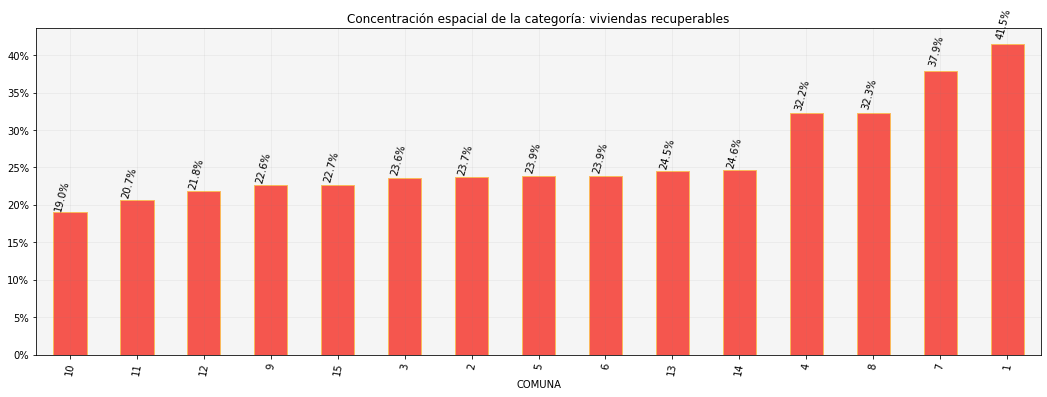

In [42]:
territorio(x=radios_inmat,id_inferior='RADIO_I',id_superior='COMUNA', 
           estadistico='CEC', categoria='viviendas recuperables', chart = 'bar')

Si recuerdan cómo se definía el índice, valores cercanos a la unidad (o al 100%) representaban unidades administrativas con una mayor proporción del grupo minoritario (nuestras viviendas recuperables). Contrariamente, el cero nos indicaba una misma proporción entre estas y el resto de las viviendas (nuestra población).

Con esto, podemos decir que las comunas `1`, `7` y `8` son las que mayor concentración de `viviendas recuperables` presenta. Qué significa esto?, si analizamos la malla conformada por las unidades administrativas inferiores - los radios censales -, se ve con mucha claridad que en los polígonos delimitados dentro de las mismas se presentan focos de concentración donde parece haber una mayor cantidad de `viviendas recuperables`. Es decir, que la distribución territorial de la categoría `viviendas recuperables` es bastante desigual (o segmentada - todas los casos en un mismo lugar). 

Por lo tanto, si quisieramos identificar potenciales casos de intervención (recordemos que para el INDEC, las viviendas recuperables son aquellas que requieren reparación o modificación para que puedan cumplir con las condiciones adecuadas) sabríamos que allí sería un buen comienzo.

Este método se vuelve útil, sobretodo si consideramos la imposibilidad de usar otras herramientas como `DBSCAN` ya que nuesrtra información se encuentra agregada como polígono (no contamos con puntos).

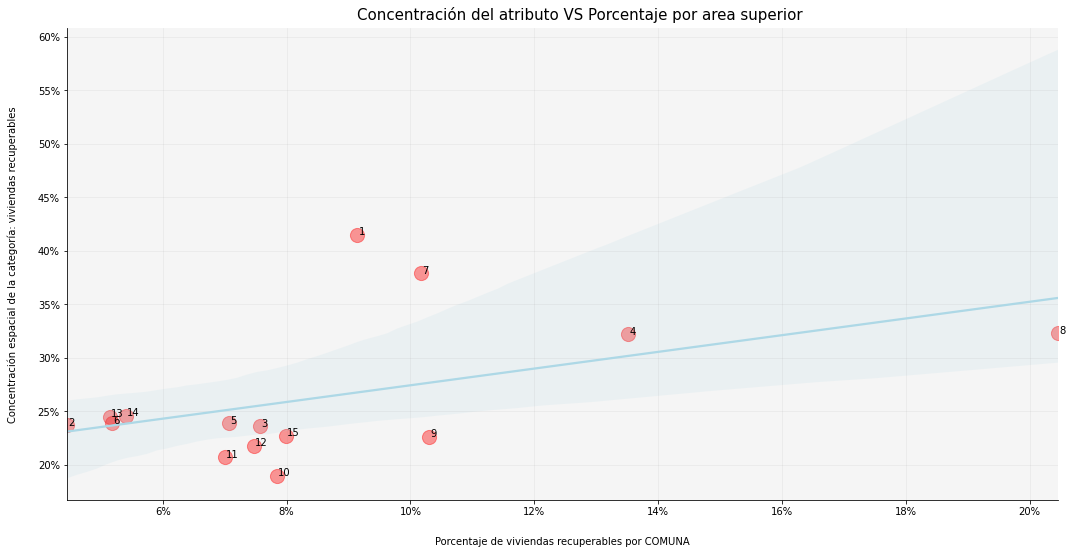

In [43]:
# si cambiamos el parametro 'chart' podemos ver cómo es la relación del índice y el porcentaje de casos
territorio(x=radios_inmat,id_inferior='RADIO_I',id_superior='COMUNA', 
           estadistico='CEC', categoria='viviendas recuperables', chart = 'scatter')

Esto qué nos indica? Una lectura posible es que un mayor porcentaje de casos no siempre tiene que ver con una distribución disímil o heterogénea en al territorio. Por ejemplo, en la comuna `1` no es donde mayor porcentaje de viviendas recuperables hay. No hay muchas viviendas de esta categoría, pero las que hay no están lejos entre sí.

En otras palabras, pueden haber áreas con alta o baja presencia de la categoría objetivo, y altos o bajos niveles de concentración/dispersión.

Como nuestro plan de renovación tiene como objetivo reinsertar unidades habitacionales al mercado formal, podríamos pensar que un buen primer paso sería distinguir aquellas áreas donde no sólo hay mayor presencia de viviendas recuperables sino también donde la distribución territorial es más desigual.

En ese sentido, la comuna `8` tiene casi el doble de casos que la `7` (comuna que estaba entre las tres primeras) y con una distribución territorial bastante parecida. 

In [44]:
def construye_territorio(gdf, nombre_unidad_s, nombre_unidad_i, 
                         nombre_variable, nombre_categoria, estadistico, tipo):
    """
    Realza una selección total o parcial dentro de un área metropolitana
    y la caracteriza a partir de su contexto urbano.
    ...
    
    Parametros:
    -----------
    gdf(gdf): area de análisis de nivel administrativo inferior
    nombre_unidad_s (str): nombre del area administrativa superior
    nombre_unidad_i(str): nombre del area administrativa inferior
    nombre_variable (str): nombre de la variable que contiene el universo 
                           total de nuestra categoría (e.g.: "hogares","viviendas","personas")
    nombre_categoría (str): nombre de la categoría contenida dentro de un universo o población
                            mayor (e.g.: "hogares con nbi", "viviendas recuperables", "mujeres", etc.)  
    estadístico (str): nombre del indicador con el que se describe el recorte territorial.
                       Cada uno corresponde a un método de la clase "ContextoUrbano"
                       (e.g.: "CEC", etc.)
    tipo (str): tipo de gráfico de salida para el método concentracion_espacial_plot()
    
    Devuelve:
    -------
    matplotlib.figure: chart representando los valores del estadístico deleccionado
    pandas.dataframe:  totales de un índice para cada nivel administrativo

    """
    
    unidad_administrativa = atributos_urbanos(inferior_gdf=gdf, 
                                              idas = nombre_unidad_s, idai=nombre_unidad_i, 
                                              universo=nombre_variable, categoria=nombre_categoria)
    
    territorio = ContextoUrbano(unidad_administrativa['inferior'],unidad_administrativa['superior'])
    
    if estadistico:
        return territorio.concentracion_espacial_plot(x=gdf,
                                                      id_inferior=nombre_unidad_i,
                                                      id_superior=nombre_unidad_s,
                                                      estadistico=estadistico,
                                                      categoria=nombre_categoria,
                                                      chart = tipo)
    else:
        return territorio.concentracion_espacial(x=gdf,
                                                 id_inferior=nombre_unidad_i,
                                                 id_superior=nombre_unidad_s)

En la clase que definimos arriba integramos todo esto en una única función. Esto con la intención de alternar el área administrativa superior y la categoría para la que analizaremos una distribución espacial.  Supongamos que queremos tener la ductilidad de decidir si nuetra medida de distribución territorial, es construida en relación a una u otra unidad adminisrtrativa superior. O incluso, que queremos que esta relación se apoye en atributos diferentes. Ya sea otra categoría de la variable viviendas, o por que no otra variable como hogares y la presencia de necesidades básicas insatisfechas. 

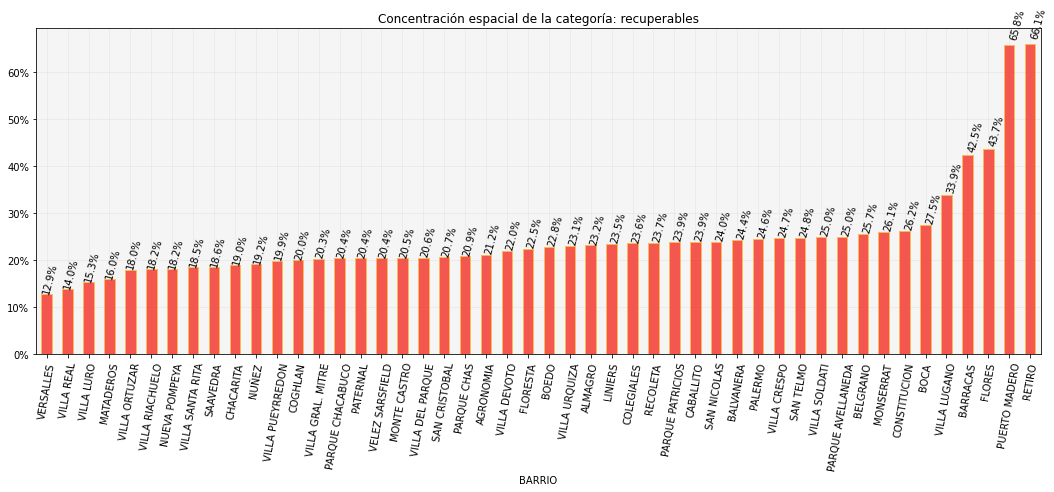

In [45]:
# podemos ver el índice de concentración para otra categoría de viviendas por barrio
construye_territorio(gdf=radios_inmat, nombre_unidad_s='BARRIO', nombre_unidad_i='RADIO_I', 
                     nombre_variable='VIVIEND', nombre_categoria='recuperables', estadistico='CEC', tipo='bar')

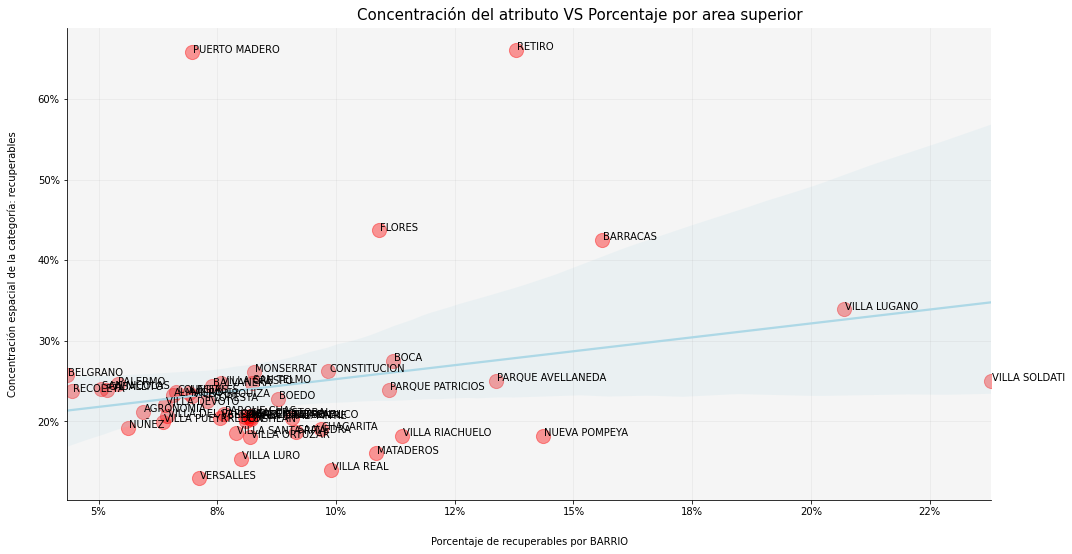

In [46]:
# para distintos tipos de representaciones
construye_territorio(gdf=radios_inmat, nombre_unidad_s='BARRIO', nombre_unidad_i='RADIO_I', 
                     nombre_variable='VIVIEND', nombre_categoria='recuperables', estadistico='CEC', tipo='scatter')

Acá no solamente sería posible alternar entre áreas administrativas superiores de distintos niveles. Tomando siempre como unidad mínima el radio censal, podríamos ir agregando otras variables (para lo que deberíamos volver a unir un atributo deseado como hicimos en la sección anterior de esta misma clase). Podrían ser hogares con NBI o algún otro atributo de las viviendas como calidad de conexión a servicios básicas y reniciar todo el proceso. 

Como ejercicio, les proponemos que 

1. Visiten el Web redatam, descarguen alguna información de interés e intenten 
2. Aplicar esta clase pero tratando de entender la distribución territorial de algún atrbuto que sea de su interés. 

Para concluir, tratemos de darle una interpretación espacial a esto que construimos. Para eso, sería muy útil poder ver cómo se comporta espacialmente este índice que definimos a partir de la interrelación de dos de los atributos de nuestro objeto `territorio`. Por lo que pudimos ver, los valores más altos se ubicaban hacie el borde este (Puerto Madelo y Retiro) y hacia la zona sur (Flores, Barracas, La Boca, Lugano, etc.).

Tratemos entonces de llevar el scatter que inlcuimos como método en nuestra clase, a un mapa que combine tanto el nivel administrativo inferior como superior. 

In [49]:
# cargamos el gdf de comunas
comunas = gpd.read_file('../carto/comunas.shp')

In [50]:
comunas.head()

BARRIOS     PERIMETRO          AREA  \
0                                 RECOLETA  21452.838648  6.317265e+06   
1                          ALMAGRO - BOEDO  12323.432479  6.660603e+06   
2                                CABALLITO  10990.964471  6.851029e+06   
3                FLORES - PARQUE CHACABUCO  17972.257870  1.242290e+07   
4  LINIERS - MATADEROS - PARQUE AVELLANEDA  21411.738344  1.650531e+07   

   COMUNAS  ID          OBJETO  \
0      2.0   1  LIMITE COMUNAL   
1      5.0   2  LIMITE COMUNAL   
2      6.0   3  LIMITE COMUNAL   
3      7.0   4  LIMITE COMUNAL   
4      9.0   5  LIMITE COMUNAL   

                                            geometry  
0  POLYGON ((107643.458 106569.299, 107641.492 10...  
1  POLYGON ((104625.143 101679.935, 104629.994 10...  
2  POLYGON ((102998.760 102464.802, 103002.947 10...  
3  POLYGON ((101036.604 99947.208, 101075.002 998...  
4  POLYGON ((94869.346 99583.645, 94885.072 99583...

In [51]:
# obtenemos nuestro índice
cec = territorio.concentracion_espacial(x=radios_inmat,id_inferior='RADIO_I',id_superior='COMUNA')

In [52]:
cec.head()

COMUNA    CEC
0      1  0.415
1     10  0.190
2     11  0.207
3     12  0.218
4     13  0.245

In [53]:
# creamos esta funcion para asegurarnos que los dtypes de las columnas con las que uniremos sean iguales
def cambia_tipo(df,columna):
    df[columna]=df[columna].apply(lambda x: int(x))
    return df

In [54]:
# mergeamos nuestro indice de concentracion
comunas = pd.merge(cambia_tipo(comunas, 'COMUNAS'), cambia_tipo(cec, 'COMUNA'), 
                   how='left',left_on='COMUNAS', right_on='COMUNA')

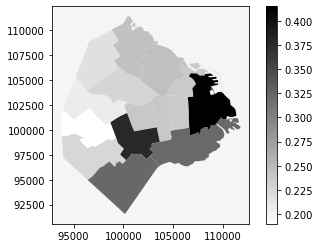

In [55]:
# vemos las zonas donde el nivel de concentración es mayor
comunas.plot(column='CEC', cmap = 'gist_yarg', legend=True);

In [56]:
# creamos la variable a constrastar, en este caso el porcentaje de viviendas recuperables por radio censal
radios_inmat['z_recuperables'] = round(radios_inmat['recuperables']/radios_inmat['VIVIEND']*100,2)

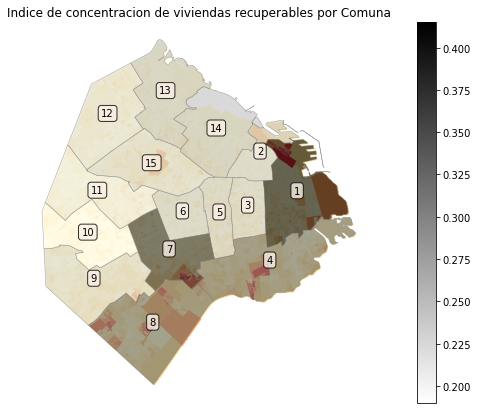

In [57]:
# y ploteamos...
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(1,1,1)

radios_inmat.to_crs(comunas.crs).plot(column = 'z_recuperables',cmap='YlOrRd',ax=ax1, alpha = 0.9, legend=False)
comunas.plot(ax=ax1, column='CEC', cmap = 'gist_yarg',edgecolor='grey', 
             linewidth=0.6, alpha = 0.6, legend=True)

props = dict(boxstyle='round', facecolor='linen', alpha=0.8)
for point in comunas.iterrows():
    ax1.text(point[1]['geometry'].centroid.x,
             point[1]['geometry'].centroid.y,
             point[1]['COMUNAS'],
             horizontalalignment='center',
             fontsize=10,
             bbox=props) 

ax1.set_axis_off()
ax1.set_title('Indice de concentracion de viviendas recuperables por Comuna');

Como conclusión de este análisis, podemos decir que la categoría `viviendas recuperables` parece representar un sector de la ciudad con focos de alta concentración de unidades habitacionales que requieren algún tipo de intervención que mejore los estándares de habitabilidad (materiales, acceso a servicios, etc).

En el mapa, se aprecia con claridad que la intersección de los límites entre las comunas `8` y `7` conforman un núcleo donde la presencia de viviendas de esta categoría parece ser mayor.

Por lo tanto, el sur de la ciudad sería un área susceptible de incorporar dentro de los lineamientos de un plan en el cual la mejora de las condiciones habitacionales constituye uno de los objetivos principales. No sólo por la cantidad de viviendas recuperables sino por los focos de concentración.

**Clase 3. 
Ejercicitación final:**


A modo de integración de todos los temas vistos en el transcurso de las partes 1 y 2 de esta clase, te proponemos el siguiente conjunto de ejercicios:

**1.** Instanciar un objeto territorio donde el nivel administrativo superior sean los barrios.

**2.** Elegir una variable (puede ser la misma, viviendas recuperables) y calcular su porcentaje sobre el total para la unidad amidnistrativa inferior.

**3.** Agregar el GDF de nivel superior el valor del índice de concentración.

**4.** Plotear ambos GDF superponiendo el índice en la capa superior.

**5.** A los que hayan elegido la misma capa (viviendas recuperables), agregarla al `ax2` del plot anterior.

**6.** Por último, plotear escenarios diferentes a partir del uso de los distintos esquemas de clasificación que vimos en la parte 1 de esta clase.
